# Investment portfolio Optimization using Simmulated Annealing Algorithms vs a Greedy Hueristic Approach 

A greedy algorithm, is an optimization alogirthm that always makes the choice that seems to be the best at that moment. This means that it makes a locally-optimal choice in the hope that this choice will lead to a globally-optimal solution. The algorithm makes the optimal choice at each step as it attempts to find the overall optimal way to solve the entire problem. 

Simulated annealing  on the other hand is a probabilistic technique for approximating the global optimum of a given function. The algorithm is basically hill-climbing except instead of picking the best move, it picks a random move.  If the selected move improves the solution, then it is always accepted.

In this project we assess both methods ability to create the optimal investment portfolio give a dataframe of projects, their associated revenue and the total budget as the constraint

In [1]:
import time
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
projects = pd.read_csv('/Users/pro/Business Analytics /Python/Coursework/Projects-year2.csv') # Loads the data
budget = projects['Budget'][0] # Extracts the budget

In [3]:
projects.head()

,Project,Revenue,Cost,Budget
0,1,186,166,3982518.0
1,2,1488,1328,NaN
2,3,720,600,NaN
3,4,480,400,NaN
4,5,960,800,NaN


In [4]:
min_cost = projects['Cost'].min() 
#Minimal project cost, will be used to stop the greedy algorithm when there is imposible to fit any other project
revenues = projects['Revenue'].tolist() #Extracts revenues of projects as a list
costs = projects['Cost'].tolist() #Extracts costs of projects as a list
project_id = projects['Project'].tolist() #Extract project IDs as a list



In [5]:
best_total_cost = 0 #Stores the total costs of the best portfolio
best_total_revenue = 0 #Stores the total revenue of the best portfolio
best_used_projects = [] #Stores the project IDs  in the best portfolio
best_used_projects_index = [False]*len(projects) 
#Boolean list having True when project is included and False otherwise, decision variable list

In [6]:
portfolio_eval = [] # Stores the evaluation when new best portfolio have been found (Best portfolio history)
portfolio_revenue = [] # Stores the revenue of best portfolios
portfolio_cost = [] # Stores the cost of best portfolios



In [7]:
#Initial Portfolio

sample = rd.sample(range(len(project_id)),len(project_id))  
# Simulates and shuffles the index, to create the base for random portfolio

for i in sample:  # Takes project with shuffled index, performs greedy heuristics
    if best_total_cost + costs[i] <= budget:  
        # If the shuffled project fits into budget, it gets inserted and portfolio parameters are updated
        best_total_revenue = best_total_revenue + revenues[i]
        best_total_cost = best_total_cost + costs[i]
        best_used_projects.append(project_id[i])
        best_used_projects_index[i] = True

    elif budget - best_total_cost < min_cost:  
# If project does not fit, checks whether there is free budget to insert any project at all, if not break the loop
        break
    else:  # If there is enough space to fit some project, the loop continues
            next

print('Budget:', budget)
print('Total Costs', best_total_cost)
print('Total Revenue', best_total_revenue)
print('Project Ratio', best_total_revenue / best_total_cost)
print('Number of projects:', len(best_used_projects))
#print('Projects used:', best_used_projects)
#print(projects.loc[best_used_projects_index])


best_tc1=best_total_cost
best_tr1=best_total_revenue

('Budget:', 3982518.0)
('Total Costs', 3982490)
('Total Revenue', 4578150)
('Project Ratio', 1)
('Number of projects:', 5413)


In [8]:
#Simulated Annealing
eval = 0
T = 10
max_eval=len(project_id)
P=5
portfolio_eval.append(eval) #Inserts the initial portfolio into history table
portfolio_revenue.append(best_total_revenue)
portfolio_cost.append(best_total_cost)

while eval < max_eval:
    total_cost = 0 #Resets the new portfolio characteristics every evaluations
    total_revenue = 0
    used_projects = []
    used_projects_index = best_used_projects_index[:] #Use the current best portfolio as the base

    index_sample = rd.sample(range(len(project_id)),P) #Randomly selects P decision variables in current best portfolio

    for i in index_sample:
        used_projects_index[i] = not best_used_projects_index[i] #Flips the P randomly selected decision variables

    for j in projects.loc[used_projects_index].index: #Calculates the parameters of new portfolio
        total_revenue = total_revenue + revenues[j]
        total_cost = total_cost + costs[j]
        used_projects.append(project_id[j])

    if total_cost <= budget: #Checks whether the new portfolio is feasible
        if np.exp((total_revenue - best_total_revenue)/T) > rd.random(): 
            #If the new portfolio is better than current best, replace the current best
            best_total_revenue = total_revenue
            best_total_cost = total_cost
            best_used_projects = used_projects
            best_used_projects_index = used_projects_index

            portfolio_eval.append(eval)
            portfolio_revenue.append(best_total_revenue)
            portfolio_cost.append(best_total_cost)

    eval = eval + 1
    T = 0.95 * T

print('Budget:', budget)
print('Total Costs', best_total_cost)
print('Total Revenue', best_total_revenue)
print('Project Ratio', best_total_revenue / best_total_cost)
print('Number of projects:', len(best_used_projects))
#print('Projects used:', best_used_projects)
#print(projects.loc[best_used_projects_index])

portfolios = pd.DataFrame({'Evaluations': portfolio_eval, 'Revenue': portfolio_revenue,"Cost": portfolio_cost})  
# Dataframe of history of best portfolios
#print(portfolios[['Evaluations', 'Revenue', 'Cost']])

print(best_total_revenue)



/Users/pro/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in exp


('Budget:', 3982518.0)
('Total Costs', 3982490)
('Total Revenue', 4582770)
('Project Ratio', 1)
('Number of projects:', 5442)
4582770


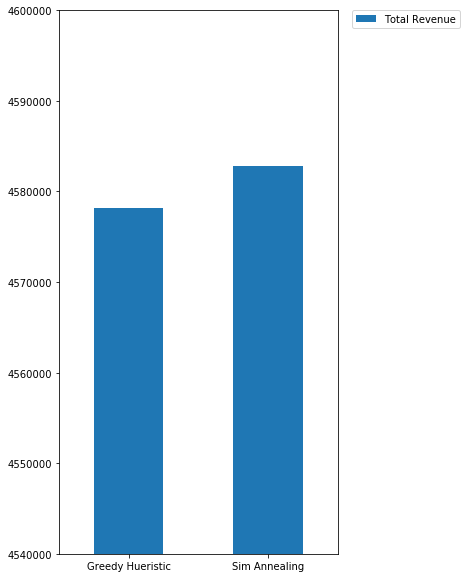

In [9]:
Total_Revenue = [best_tr1,best_total_revenue]
Total_Cost = [best_tc1, best_total_cost]
index = ['Greedy Hueristic', 'Sim Annealing']
df = pd.DataFrame({'Total Revenue': Total_Revenue,
                  'Total Cost': Total_Cost},index=index)

#plt.axis([None,None,3000000,4700000])

ax = df['Total Revenue'].plot.bar(figsize=(5,10),rot=0)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.axis([None,None,4540000,4600000])


plt.show()

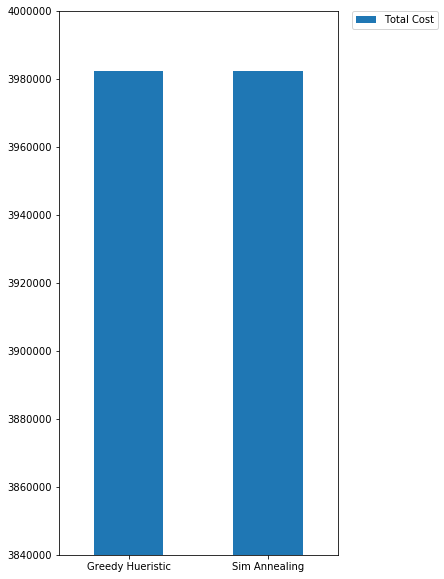

In [10]:

ax = df['Total Cost'].plot.bar(figsize=(5,10),rot=0)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.axis([None,None,3840000,4000000])


plt.show()

From the above graphs, it is easy to see how a simmulated anealing algorithm optimizes the portfolio by increasing revenue while keeping the total cost virtually the same 